* df[‘salary'] = pd.to_numeric(df[‘salary'], errors='coerce’)
* df[‘description'] = df[‘description'].astype(str)
* df[”description"] = df[”description"].str.replace(‘$','')
* df.dropna(inplace = True)
* df.fillna(0)

In [1]:
import pandas as pd

In [2]:
xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data')

In [3]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


In [4]:
df_cities = xls.parse('cities')

In [5]:
df_cities.head()

,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [6]:
df = pd.merge(left=df, right=df_cities, how='inner', left_on='city_id', right_on='id')

In [7]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [8]:
df_states = xls.parse('states')

In [9]:
df_states.head()

,id,state
0,1,PA
1,2,NV


In [10]:
df = pd.merge(left=df, right=df_states, how='inner', left_on='state_id', right_on='id')

In [11]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [12]:
df.shape

(600, 12)

In [13]:
atts = ['name', 'city', 'state']
df[atts].head(100)

,name,city,state
0,China Sea Chinese Restaurant,Bellevue,PA
1,Discount Tire Center,Bellevue,PA
2,Frankfurters,Bellevue,PA
3,Fred Dietz Floral,Bellevue,PA
4,Kuhn's Market,Bellevue,PA
...,...,...,...
95,Aamco Transmissions,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Pittsburgh,PA
97,Aracri's Greentree Inn,Pittsburgh,PA
98,Atch-Mont Real Estate,Pittsburgh,PA


In [14]:
del df['id_x']

In [15]:
del df['id_y']

In [16]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA


In [17]:
#slicing 
df[100:200]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
100,Au Bon Pain Co,Food,Bakeries,False,7,3.0,8,1,Pittsburgh,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
102,Bastone Auto Service,Auto Repair,Automotive,False,20,4.0,8,1,Pittsburgh,PA
103,Bellisario's Pizza Palace,Italian,Pizza,True,21,3.5,8,1,Pittsburgh,PA
104,Benedum Center for the Performing Arts,Opera & Ballet,Arts & Entertainment,False,56,4.5,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
195,McDonald's,Burgers,Fast Food,True,5,2.0,8,1,Pittsburgh,PA
196,Miller Ace Hardware,Shopping,Hardware Stores,False,5,4.5,8,1,Pittsburgh,PA
197,Minutello's Restaurant & Lounge,Italian,Pizza,True,8,3.0,8,1,Pittsburgh,PA
198,Monro Muffler Brake & Service,Tires,Automotive,False,9,2.0,8,1,Pittsburgh,PA


In [18]:
index = len(df) - 1
last_business = df[index:]
last_business['name']

599    A Sunrise Towing
Name: name, dtype: object

In [19]:
df[-1:]['name']

599    A Sunrise Towing
Name: name, dtype: object

In [20]:
#filtering 
pitts = df['city'] == 'Pittsburgh'

In [21]:
type(pitts)

pandas.core.series.Series

In [22]:
pitts

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: city, Length: 600, dtype: bool

In [23]:
df[pitts]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
283,Walter's Automotive,Auto Repair,Automotive,False,99,5.0,8,1,Pittsburgh,PA
284,Washington's Landing Marina,Active Life,Boating,False,3,3.0,8,1,Pittsburgh,PA
285,West Liberty Cycles,Sporting Goods,Bikes,False,8,4.5,8,1,Pittsburgh,PA
286,Wiseguys Pizza,Restaurants,Pizza,True,12,3.0,8,1,Pittsburgh,PA


In [24]:
rest = df['name'] == 'The Dragon Chinese Cuisine'
df[rest]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
93,The Dragon Chinese Cuisine,Restaurants,Chinese,True,7,3.0,7,1,Munhall,PA


In [25]:
df[rest]['take_out']

93    True
Name: take_out, dtype: bool

In [26]:
cat_0_bars = df['category_0'] == 'Bars'
cat_1_bars = df['category_1'] == 'Bars'
df[cat_0_bars | cat_1_bars]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
12,Emil's Lounge,Bars,American (New),True,26,4.5,2,1,Braddock,PA
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA
42,Duke's Upper Deck Cafe,Pubs,Bars,True,33,3.5,4,1,Homestead,PA
62,Randy's Beer Barrel Pub,Pubs,Bars,False,3,2.5,4,1,Homestead,PA
70,TGI Fridays,Bars,American (Traditional),True,23,2.5,4,1,Homestead,PA
77,Applebee's,Bars,American (Traditional),True,9,3.5,5,1,Mc Kees Rocks,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
114,Buffalo Blues,Restaurants,Bars,True,62,3.0,8,1,Pittsburgh,PA
119,Cappy's Cafe,Bars,American (Traditional),True,51,3.0,8,1,Pittsburgh,PA


In [27]:
cat_0_bars = df['category_0'] == 'Bars'
cat_1_bars = df['category_1'] == 'Bars'
carnegie = df['city'] == 'Carnegie'
df[(cat_0_bars | cat_1_bars) & carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [28]:
cat_0 = df['category_0'].isin(['Bars', 'Restaurants'])
cat_1 = df['category_1'].isin(['Bars', 'Restaurants'])
carnegie = df['city'] == 'Carnegie'
df[(cat_0 | cat_1) & carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
18,Barb's Country Junction Cafe,Restaurants,Cafes,True,9,4.0,3,1,Carnegie,PA
20,Don Don Chinese Restaurant,Restaurants,Chinese,True,10,2.5,3,1,Carnegie,PA
29,Papa J's,Restaurants,Italian,True,81,3.5,3,1,Carnegie,PA
30,Porto Fino Pizzaria & Gyro,Restaurants,Pizza,False,4,2.5,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [29]:
lv = df['city'] == 'Las Vegas'
cat_0_bars = df['category_0'] == 'Dive Bars'
cat_1_bars = df['category_1'] == 'Dive Bars'
divebars_lv = df[lv & (cat_0_bars | cat_1_bars)]
len(divebars_lv)

3

In [30]:
stars = divebars_lv['stars'] >= 4.0
divebars_lv_4star_rating = divebars_lv[stars]

In [31]:
divebars_lv_4star_rating

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
451,Huntridge Tavern,Dive Bars,Bars,False,50,4.0,12,2,Las Vegas,NV
453,Moon Doggies,Dive Bars,Bars,False,85,4.0,12,2,Las Vegas,NV


In [32]:
import random

In [33]:
rand_int = random.randint(0, len(divebars_lv_4star_rating) - 1)
rand_divebar = divebars_lv_4star_rating[rand_int : rand_int + 1]
rand_divebar

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
451,Huntridge Tavern,Dive Bars,Bars,False,50,4.0,12,2,Las Vegas,NV


In [34]:
rand_int = random.randint(0, len(divebars_lv_4star_rating) - 1)
rand_divebar = divebars_lv_4star_rating.iloc[rand_int]
rand_divebar

name            Moon Doggies
category_0         Dive Bars
category_1              Bars
take_out               False
review_count              85
stars                      4
city_id                   12
state_id                   2
city               Las Vegas
state                     NV
Name: 453, dtype: object

In [35]:
cat_0 = df['category_0'].str.contains('Nail Salon')
cat_1 = df['category_1'].str.contains('Nail Salon')
henderson = df['city'] == 'Henderson'
df[(cat_0 | cat_1) & henderson]['review_count'].sum()

158

In [36]:
df[(cat_0 | cat_1) & henderson]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
386,Best Nails,Beauty & Spas,Nail Salons,False,56,3.0,11,2,Henderson,NV
387,Desert Nails,Beauty & Spas,Nail Salons,False,30,2.5,11,2,Henderson,NV
388,First Choice Nails,Beauty & Spas,Nail Salons,False,38,3.5,11,2,Henderson,NV
389,Q Nails,Beauty & Spas,Nail Salons,False,34,4.0,11,2,Henderson,NV


In [37]:
cat_0 = df['category_0'].str.contains('Nail Salon')
cat_1 = df['category_1'].str.contains('Nail Salon')
henderson = df['city'] == 'Henderson'
df[(cat_0 | cat_1) & henderson]['review_count'].mean()

39.5

In [38]:
cat_0 = df['category_0'].str.contains('Auto Repair')
cat_1 = df['category_1'].str.contains('Auto Repair')
henderson = df['city'] == 'Pittsburgh'
df[(cat_0 | cat_1) & henderson]['stars'].mean()

4.5

In [39]:
cat_0 = df['category_0'].str.contains('Nail Salon')
cat_1 = df['category_1'].str.contains('Nail Salon')
henderson = df['city'] == 'Pittsburgh'
df[(cat_0 | cat_1) & henderson]['stars'].mean()

3.0

In [40]:
df['city'].unique()

array(['Bellevue', 'Braddock', 'Carnegie', 'Homestead', 'Mc Kees Rocks',
       'Mount Lebanon', 'Munhall', 'Pittsburgh', 'West Homestead',
       'West Mifflin', 'Henderson', 'Las Vegas', 'North Las Vegas'],
      dtype=object)

In [41]:
df['city'].value_counts() #counts records for each city

Pittsburgh         193
Las Vegas          133
Henderson          130
Homestead           41
North Las Vegas     37
Carnegie            22
Bellevue            12
Mc Kees Rocks       10
West Mifflin         9
Munhall              4
Mount Lebanon        4
West Homestead       3
Braddock             2
Name: city, dtype: int64

In [42]:
df['city'].nunique() #counts non null unique values

13

In [43]:
#creating new columns
df['categories'] = df['category_0'].str.cat(df['category_1'], sep=',')
df

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,"Restaurants,Chinese"
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,"Tires,Automotive"
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,"Restaurants,Hot Dogs"
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,"Shopping,Flowers & Gifts"
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,"Food,Grocery"
...,...,...,...,...,...,...,...,...,...,...,...
595,Republic Services of Southern Nevada Recycling...,Local Services,Recycling Center,False,7,2.5,13,2,North Las Vegas,NV,"Local Services,Recycling Center"
596,SA Recycling,Local Services,Recycling Center,False,3,1.5,13,2,North Las Vegas,NV,"Local Services,Recycling Center"
597,Jack In the Box,Restaurants,Fast Food,True,12,3.0,13,2,North Las Vegas,NV,"Restaurants,Fast Food"
598,Custom Hearth & Door,Shopping,Heating & Air Conditioning/HVAC,False,9,4.0,13,2,North Las Vegas,NV,"Shopping,Heating & Air Conditioning/HVAC"


In [44]:
df[df['categories'].str.contains('Pizza')]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories
6,Luigi's Pizzeria,Restaurants,Pizza,True,18,4.0,1,1,Bellevue,PA,"Restaurants,Pizza"
8,R & B's Pizza Place,Restaurants,Pizza,True,17,4.0,1,1,Bellevue,PA,"Restaurants,Pizza"
30,Porto Fino Pizzaria & Gyro,Restaurants,Pizza,False,4,2.5,3,1,Carnegie,PA,"Restaurants,Pizza"
48,Homestead Capri Pizza,Italian,Pizza,True,4,2.0,4,1,Homestead,PA,"Italian,Pizza"
49,Italian Village Pizza,Restaurants,Pizza,False,6,2.5,4,1,Homestead,PA,"Restaurants,Pizza"
73,Uno Pizzeria & Grill,American (Traditional),Pizza,True,55,3.0,4,1,Homestead,PA,"American (Traditional),Pizza"
83,Pasquarelli's Pizza House,Restaurants,Pizza,True,13,4.0,5,1,Mc Kees Rocks,PA,"Restaurants,Pizza"
94,The Pizza Company,Restaurants,Pizza,True,12,4.0,7,1,Munhall,PA,"Restaurants,Pizza"
103,Bellisario's Pizza Palace,Italian,Pizza,True,21,3.5,8,1,Pittsburgh,PA,"Italian,Pizza"
105,Beto's Pizza,Restaurants,Pizza,True,145,4.0,8,1,Pittsburgh,PA,"Restaurants,Pizza"


In [45]:
df['rating'] = df['stars'] * 2

In [46]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,"Restaurants,Chinese",5.0
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,"Tires,Automotive",9.0
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,"Restaurants,Hot Dogs",9.0
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,"Shopping,Flowers & Gifts",8.0
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,"Food,Grocery",7.0


In [47]:
def convert_to_rating(x):
    return (str(x) + 'out of 10')

In [48]:
df['rating'] = df['rating'].apply(convert_to_rating)

In [49]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,"Restaurants,Chinese",5.0out of 10
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,"Tires,Automotive",9.0out of 10
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,"Restaurants,Hot Dogs",9.0out of 10
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,"Shopping,Flowers & Gifts",8.0out of 10
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,"Food,Grocery",7.0out of 10


In [50]:
df.groupby(['city']).groups.keys()

dict_keys(['Bellevue', 'Braddock', 'Carnegie', 'Henderson', 'Homestead', 'Las Vegas', 'Mc Kees Rocks', 'Mount Lebanon', 'Munhall', 'North Las Vegas', 'Pittsburgh', 'West Homestead', 'West Mifflin'])

In [51]:
len(df.groupby(['city']).groups['Las Vegas'])

133

In [52]:
import numpy as np

In [53]:
df.groupby(['city']).agg([np.sum, np.mean, np.std])['stars']

,sum,mean,std
city,,,
Bellevue,45.0,3.750000,0.783349
Braddock,9.5,4.750000,0.353553
Carnegie,76.0,3.454545,0.688495
Henderson,444.5,3.419231,0.906060
Homestead,134.5,3.280488,0.837024
Las Vegas,452.0,3.398496,1.042214
Mc Kees Rocks,37.0,3.700000,0.856349
Mount Lebanon,12.5,3.125000,1.108678
Munhall,12.0,3.000000,0.816497


In [54]:
#pivot table - creates a new table from the contents in the dataframe
pivot_table = pd.pivot_table(df, index = ['city'])
pivot_table

,city_id,review_count,stars,state_id,take_out
city,,,,,
Bellevue,1,13.166667,3.750000,1,0.500000
Braddock,2,14.500000,4.750000,1,0.500000
Carnegie,3,13.590909,3.454545,1,0.409091
Henderson,11,33.323077,3.419231,2,0.238462
Homestead,4,23.243902,3.280488,1,0.268293
Las Vegas,12,54.330827,3.398496,2,0.218045
Mc Kees Rocks,5,10.700000,3.700000,1,0.700000
Mount Lebanon,6,6.250000,3.125000,1,0.250000
Munhall,7,22.750000,3.000000,1,0.750000


In [55]:
type(pivot_table)

pandas.core.frame.DataFrame

In [56]:
pivot_state_take = pd.pivot_table(df, index = ['state', 'take_out'])
pivot_state_take

city_id  review_count     stars  state_id
state take_out                                             
NV    False     11.698276     16.900862  3.409483         2
      True      11.661765    118.161765  3.198529         2
PA    False      6.643678     11.580460  3.695402         1
      True       6.769841     49.936508  3.535714         1

In [57]:
bars_rest = df['category_0'].isin(['Bars', 'Restaurants'])
df_bars_rest = df[bars_rest]
df_bars_rest

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,"Restaurants,Chinese",5.0out of 10
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,"Restaurants,Hot Dogs",9.0out of 10
6,Luigi's Pizzeria,Restaurants,Pizza,True,18,4.0,1,1,Bellevue,PA,"Restaurants,Pizza",8.0out of 10
8,R & B's Pizza Place,Restaurants,Pizza,True,17,4.0,1,1,Bellevue,PA,"Restaurants,Pizza",8.0out of 10
9,Rusty Nail,Restaurants,American (Traditional),True,32,3.5,1,1,Bellevue,PA,"Restaurants,American (Traditional)",7.0out of 10
...,...,...,...,...,...,...,...,...,...,...,...,...
537,Pho So 1,Restaurants,Vietnamese,True,763,3.5,12,2,Las Vegas,NV,"Restaurants,Vietnamese",7.0out of 10
538,Rice To-Go,Restaurants,Chinese,True,19,3.0,12,2,Las Vegas,NV,"Restaurants,Chinese",6.0out of 10
539,Wienerschnitzel,Restaurants,Fast Food,False,3,1.0,12,2,Las Vegas,NV,"Restaurants,Fast Food",2.0out of 10
593,Sporting Chance Saloon,Bars,Nightlife,False,7,3.5,13,2,North Las Vegas,NV,"Bars,Nightlife",7.0out of 10


In [58]:
pivot_state_cat = pd.pivot_table(df_bars_rest, index = ['state', 'city', 'category_0'])

In [59]:
pivot_state_cat[['review_count', 'stars']]

review_count     stars
state city            category_0                         
NV    Henderson       Bars           171.000000  3.000000
                      Restaurants    102.454545  3.181818
      Las Vegas       Bars            15.500000  4.000000
                      Restaurants    221.153846  3.153846
      North Las Vegas Bars             7.000000  3.500000
                      Restaurants     12.000000  3.000000
PA    Bellevue        Restaurants     14.000000  3.916667
      Braddock        Bars            26.000000  4.500000
      Carnegie        Bars            16.500000  4.000000
                      Restaurants     26.000000  3.125000
      Homestead       Bars            23.000000  2.500000
                      Restaurants      6.000000  2.500000
      Mc Kees Rocks   Bars             9.000000  3.500000
                      Restaurants      7.333333  3.333333
      Munhall         Restaurants      9.500000  3.500000
      Pittsburgh      Bars            20.000000  3.416667
                      Restaurants     67.000000  3.203704
      West Homestead  Bars            92.000000  2.500000
      West Mifflin    Restaurants      5.000000  4.333333

In [60]:
pivot_state_cat = pd.pivot_table(df_bars_rest, index = ['state', 'city', 'category_0'], values = ['review_count'], aggfunc = [np.sum])
pivot_state_cat

sum
                                  review_count
state city            category_0              
NV    Henderson       Bars                 171
                      Restaurants         1127
      Las Vegas       Bars                  31
                      Restaurants         2875
      North Las Vegas Bars                   7
                      Restaurants           12
PA    Bellevue        Restaurants           84
      Braddock        Bars                  26
      Carnegie        Bars                  33
                      Restaurants          104
      Homestead       Bars                  23
                      Restaurants            6
      Mc Kees Rocks   Bars                   9
                      Restaurants           22
      Munhall         Restaurants           19
      Pittsburgh      Bars                 120
                      Restaurants         1809
      West Homestead  Bars                  92
      West Mifflin    Restaurants           15

In [61]:
pivot_agg = pd.pivot_table(df, index = ['state', 'city'], values = ['review_count'], aggfunc = [np.sum])
pivot_agg

sum
                      review_count
state city                        
NV    Henderson               4332
      Las Vegas               7226
      North Las Vegas          398
PA    Bellevue                 158
      Braddock                  29
      Carnegie                 299
      Homestead                953
      Mc Kees Rocks            107
      Mount Lebanon             25
      Munhall                   91
      Pittsburgh              6470
      West Homestead           124
      West Mifflin              51

In [62]:
pivot_a2 = pd.pivot_table(df, index = ['state', 'city'], values = ['review_count'], columns = ['take_out'], aggfunc = [np.sum])
pivot_a2

sum      
                      review_count      
take_out                     False True 
state city                              
NV    Henderson               2009  2323
      Las Vegas               1619  5607
      North Las Vegas          293   105
PA    Bellevue                  52   106
      Braddock                   3    26
      Carnegie                  74   225
      Homestead                323   630
      Mc Kees Rocks             48    59
      Mount Lebanon             13    12
      Munhall                   12    79
      Pittsburgh              1447  5023
      West Homestead             7   117
      West Mifflin              36    15

In [63]:
pivot_a3 = pd.pivot_table(df, index = ['state', 'city'], columns = ['take_out'], aggfunc = {'review_count' : np.sum, 'stars' : np.mean})
pivot_a3

review_count           stars          
take_out                     False True      False     True 
state city                                                  
NV    Henderson               2009  2323  3.469697  3.258065
      Las Vegas               1619  5607  3.423077  3.310345
      North Las Vegas          293   105  3.155172  2.562500
PA    Bellevue                  52   106  3.750000  3.750000
      Braddock                   3    26  5.000000  4.500000
      Carnegie                  74   225  3.269231  3.722222
      Homestead                323   630  3.416667  2.909091
      Mc Kees Rocks             48    59  3.666667  3.714286
      Mount Lebanon             13    12  3.000000  3.500000
      Munhall                   12    79  3.000000  3.000000
      Pittsburgh              1447  5023  3.836364  3.566265
      West Homestead             7   117  4.500000  2.750000
      West Mifflin              36    15  3.500000  4.333333

* built-in magic functions
 - helpful for handling the meta functs. in python
 - %pylab inline allows to load python library
* matlplotlib is popular plotting library for python
 - it is included in PyLab package
 - powerful tool that can plot a wide variety of figures and even    animate them
 - histograms --- distribution of values in a dataset
 - scatter plots --- display a set of data points or observations    for two variables in xy plane

## histograms

* import matplotlib.pyplot as plt
* prepare the data : create appropriate  dataframe or series
* plot : set various options for pyplot

In [65]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\HP\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [67]:
import matplotlib.pyplot as plt

In [68]:
df_pitts = df[df['city'] == 'Pittsburgh']

In [69]:
df_pitts.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories,rating
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA,"Auto Repair,Automotive",9.0out of 10
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA,"Animal Shelters,Veterinarians",8.0out of 10
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA,"Italian,American (New)",7.0out of 10
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA,"Real Estate Services,Property Management",4.0out of 10
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA,"American (New),Sandwiches",6.0out of 10


In [70]:
df_vegas = df[df['city'] == 'Las Vegas']

In [71]:
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories,rating
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV,"Financial Services,Accountants",9.0out of 10
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV,"Shopping,Adult",9.0out of 10
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV,"Shopping,Adult",10.0out of 10
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV,"Bars,American (Traditional)",7.0out of 10
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV,"Breakfast & Brunch,American (Traditional)",9.0out of 10


In [74]:
pitts_stars = df_pitts['stars']
vegas_stars = df_vegas['stars']
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

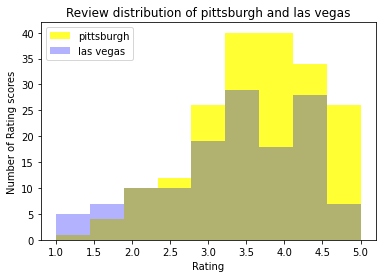

In [85]:
plt.hist(
    pitts_stars,
    alpha = 0.8,
    color = 'yellow',
    label = 'pittsburgh',
    bins ='auto'  # set the number of equal width bins in range
)
plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = 'blue',
    label = 'las vegas',
    bins ='auto'  # set the number of equal width bins in range
)
plt.xlabel('Rating')
plt.ylabel('Number of Rating scores')
plt.legend(loc = 'best')
plt.title('Review distribution of pittsburgh and las vegas')

plt.show()

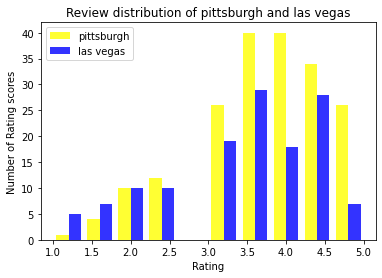

In [84]:
plt.hist(
    [pitts_stars,vegas_stars],
    alpha = 0.8,
    color = ['yellow','blue'],
    label = ['pittsburgh','las vegas'],
    bins ='auto'  # set the number of equal width bins in range
)
plt.xlabel('Rating')
plt.ylabel('Number of Rating scores')
plt.legend(loc = 'best')
plt.title('Review distribution of pittsburgh and las vegas')

plt.show()

# scatterplot

* displays a set of data points for 2 variables in a xy plane
* used to compare multiple categories on two different dimensions


In [86]:
df_health = df[df['category_0'] == 'Health & Medical']
df_fast = df[df['category_0'] == 'Fast Food']
df_break = df[df['category_0'] == 'Breakfast & Brunch']
df_break.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,categories,rating
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1,Carnegie,PA,"Breakfast & Brunch,Sandwiches",9.0out of 10
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1,Pittsburgh,PA,"Breakfast & Brunch,Creperies",8.0out of 10
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1,Pittsburgh,PA,"Breakfast & Brunch,American (Traditional)",7.0out of 10
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1,Pittsburgh,PA,"Breakfast & Brunch,Sandwiches",8.0out of 10
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1,Pittsburgh,PA,"Breakfast & Brunch,Diners",9.0out of 10


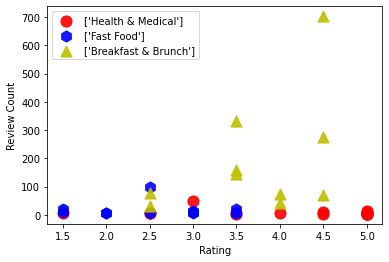

In [110]:
plt.scatter(
    df_health['stars'], df_health['review_count'],
    marker = 'o', # circle
    color = 'r',
    alpha = 0.9,
    s = 124,   # size
    label = ['Health & Medical']
)
plt.scatter(
    df_fast['stars'], df_fast['review_count'],
    marker = 'h', # hexagon
    color = 'b',
    alpha = 0.9,
    s = 124,   # size
    label = ['Fast Food']
)
plt.scatter(
    df_break['stars'], df_break['review_count'],
    marker = '^', # triangle
    color = 'y',
    alpha = 0.9,
    s = 124,   # size
    label = ['Breakfast & Brunch']
)
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.legend(loc = 'upper left')

# axes = plt.gca()  #  get the current axex for the current figure
# axes.set_yscale('log')
# axes.set_xscale('log')

plt.show()


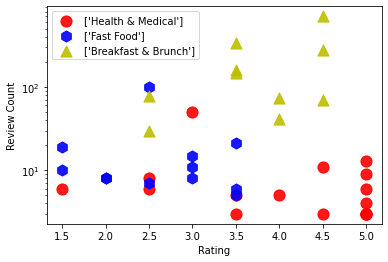

In [111]:
plt.scatter(
    df_health['stars'], df_health['review_count'],
    marker = 'o', # circle
    color = 'r',
    alpha = 0.9,
    s = 124,   # size
    label = ['Health & Medical']
)
plt.scatter(
    df_fast['stars'], df_fast['review_count'],
    marker = 'h', # hexagon
    color = 'b',
    alpha = 0.9,
    s = 124,   # size
    label = ['Fast Food']
)
plt.scatter(
    df_break['stars'], df_break['review_count'],
    marker = '^', # triangle
    color = 'y',
    alpha = 0.9,
    s = 124,   # size
    label = ['Breakfast & Brunch']
)
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.legend(loc = 'upper left')

axes = plt.gca()  #  get the current axex for the current figure
axes.set_yscale('log')
#axes.set_xscale('log')
plt.show()


# bar charts

* very similar to histograms which are used to represent the distribution of values in data
* while a histogram typically represents freq distribution of continuous values
  - bar chat is a comparison of discrete values
* histogram shows numerical data
  - bar chart shows categorial data

In [129]:
df_city_value_counts = df['city'].value_counts()
df_city_value_counts.head()

Pittsburgh         193
Las Vegas          133
Henderson          130
Homestead           41
North Las Vegas     37
Name: city, dtype: int64

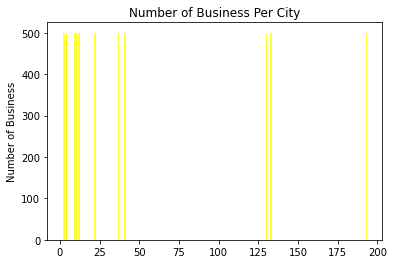

In [145]:
plt.bar(
    df_city_value_counts,
    alpha = 0.8,
    color = 'yellow',
    height = 500,
    #width = 6,
)

plt.ylabel('Number of Business')
plt.title('Number of Business Per City')

plt.show()

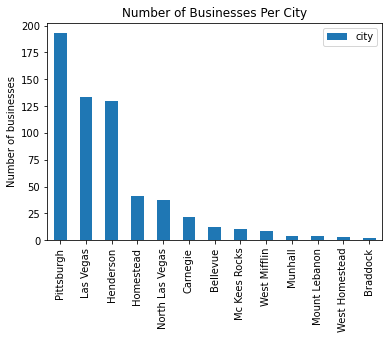

In [152]:
df_city_value_counts.plot(kind='bar', #figsize=(12, 6), #fontsize=12, 
legend=True, title="Number of Businesses Per City")
plt.ylabel("Number of businesses")
plt.show()

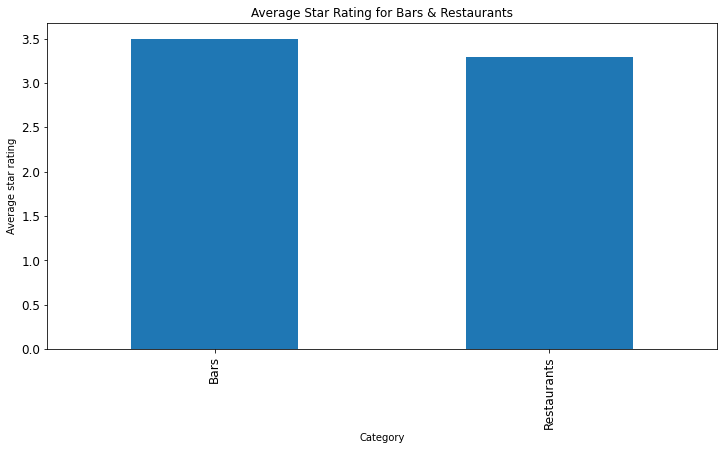

In [155]:
bar_rest = df["category_0"].isin(["Bars", "Restaurants"])
df_bar_rest = df[bar_rest]

#pivot along category
pivot_state_cat = pd.pivot_table(df_bar_rest, index=["category_0"])
#pivot_state_cat.head()

#filter the df_bar_rest DataFrame columns 
pivot_state_cat = pivot_state_cat[["stars"]] 
 
#call the plot method and set the kind parameter to ‘bar’
pivot_state_cat.plot(kind='bar', figsize=(12, 6), fontsize=12,
legend=False, title="Average Star Rating for Bars & Restaurants")
plt.xlabel("Category")
plt.ylabel("Average star rating")
plt.show()

# seaborn

* is a python data visualization lib based on matplotlib
*  It provides a high-level interface for drawing more attractive and informative statistical 
graphics
*  It can also be used to enhance matplotlib graphics 